In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, make_scorer, recall_score, f1_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, cross_validate, StratifiedKFold, \
    StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
# afisare tabele pentru gradice:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz


In [3]:
#folosirea delilitatorului ";" pentru preluarea datelor sub forma de tabel
dataframe = pd.read_csv("MergeConflictsDataset.csv",sep=';', header=0)

# DATA ANALYSIS

In [4]:
#numarul de linii si coloane
dataframe.shape

(26973, 37)

In [5]:
# verificarea datelor citite
#primele 5 inregistrari(pt toate coloanele existente)
dataframe.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1


In [6]:
#informatii generale asupra valorilor din fiecare coloana
# ex: media, deviataia standard, min max...
dataframe.describe()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
count,26973.000000,2.697300e+04,2.697300e+04,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,...,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000
mean,0.777741,4.255746e+02,2.504278e+02,4.656175,1.911801,240.714159,0.752048,2.431061,1.396545,0.970229,...,4.316205,0.955437,1.338857,0.096281,1.007860,51.391280,104.662551,69.455646,68.021095,0.054425
std,0.415772,8.887706e+03,1.027916e+04,12.230444,6.534316,908.382038,10.620490,67.840678,90.614277,64.245155,...,12.924317,3.203307,4.269666,0.541916,6.033535,34.560112,89.471017,40.057823,39.385369,0.226858
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000e+00,1.000000e+00,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,47.000000,41.000000,40.000000,0.000000
50%,1.000000,1.100000e+01,2.000000e+00,1.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000,88.000000,66.391304,65.000000,0.000000
75%,1.000000,7.500000e+01,1.500000e+01,3.000000,1.000000,139.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,67.000000,131.000000,91.714286,90.000000,0.000000
max,1.000000,1.140945e+06,1.140456e+06,158.000000,182.000000,21513.000000,1152.000000,10404.000000,10396.000000,10398.000000,...,176.000000,48.000000,78.000000,16.000000,312.000000,1326.000000,1326.000000,1326.000000,1326.000000,1.000000


In [7]:
#numele coloanelor existente
#numarul de valori nenule inregistrate
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26973 entries, 0 to 26972
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   commit           26973 non-null  object 
 1   parent1          26973 non-null  object 
 2   parent2          26973 non-null  object 
 3   ancestor         26972 non-null  object 
 4   is pr            26973 non-null  int64  
 5   added lines      26973 non-null  int64  
 6   deleted lines    26973 non-null  int64  
 7   devs parent1     26973 non-null  int64  
 8   devs parent2     26973 non-null  int64  
 9   time             26973 non-null  int64  
 10  nr files         26973 non-null  int64  
 11  added files      26973 non-null  int64  
 12  deleted files    26973 non-null  int64  
 13  renamed files    26973 non-null  int64  
 14  copied files     26973 non-null  int64  
 15  modified files   26973 non-null  int64  
 16  nr commits1      26973 non-null  int64  
 17  nr commits2 

In [8]:
#verific valorile lipsa-->nu ne dorim sa  lasam "null" pt stramos-->nu are parinte

dataframe.isnull().sum() 

commit             0
parent1            0
parent2            0
ancestor           1
is pr              0
added lines        0
deleted lines      0
devs parent1       0
devs parent2       0
time               0
nr files           0
added files        0
deleted files      0
renamed files      0
copied files       0
modified files     0
nr commits1        0
nr commits2        0
density1           0
density2           0
fix                0
bug                0
feature            0
improve            0
document           0
refactor           0
update             0
add                0
remove             0
use                0
delete             0
change             0
messages_min       0
messages_max       0
messages_mean      0
messages_median    0
conflict           0
dtype: int64

In [9]:
#fac drop la coloanele care  nu contin date importante, care afecteaza negativ rezultatul

#exista valoare null
dataframe=dataframe.drop("ancestor", axis=1)  

#nu  contin informatii la conflict
dataframe=dataframe.drop("commit", axis=1)   
dataframe=dataframe.drop("parent1", axis=1)
dataframe=dataframe.drop("parent2", axis=1) 


##Encodare

In [10]:
# encodare a coloanelor in functie de oridinea lexicografica

#se asigneaza fiecare categorie unei ordini naturale(crescatoare/lexicografica)
oe = OrdinalEncoder()
data_to_encode = dataframe.to_numpy()[:, :1]

#ajusteaza codificatorul la datele de antrenament
#datele de antrenare vor fi codificate, asignandu-se o caracteristica

# Dupa encodare, vom avea valori intre 0 si 1 !!!
encoded = oe.fit_transform(data_to_encode)

#Inspectare date

In [11]:
data = dataframe.to_numpy()

In [12]:
# ajustez dimensiunile pentru "encoded" si "data"

X= np.hstack((encoded, data[:, 4:-1]))

In [13]:
X

array([[  1.        ,   1.        ,  23.        , ...,  65.        ,
         35.4       ,  20.        ],
       [  0.        ,   2.        , 371.        , ..., 117.        ,
         58.56382979,  53.5       ],
       [  1.        ,   1.        ,  22.        , ...,  18.        ,
         18.        ,  18.        ],
       ...,
       [  1.        ,   1.        ,  22.        , ...,  58.        ,
         33.        ,  33.        ],
       [  1.        ,   1.        ,  11.        , ...,   8.        ,
          8.        ,   8.        ],
       [  1.        ,   1.        , 408.        , ...,  23.        ,
         23.        ,  23.        ]])

In [14]:
#y-ul pentru datele de antrenare
y_true =  dataframe['conflict']

In [15]:
#verific daca detul de date este dezechilibrat,
#0-25505, 1:1468 -> puternic dezechilibrat

np.unique(y_true, return_counts=True)

(array([0, 1]), array([25505,  1468]))

In [16]:
X.shape

(26973, 29)

In [17]:
# 1 coloana cu 26973 valori
y_true.shape

(26973,)

# Desenare grafie

In [18]:
#Principal Component Analysis

pca = PCA(n_components=2)

In [19]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# se calculeaza media, si se transforma in date pe care le suporta modelul
X = imp.fit_transform(X)
#generare feartures
pca_features = pca.fit_transform(X)

In [20]:
LABEL_COLOR_MAP = {0: 'white',
                   1: 'red'}

In [22]:
def plot(title, X, labels):
    plt.figure()
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=[LABEL_COLOR_MAP[l] for l in labels], marker="o", edgecolors='k')
    plt.show()

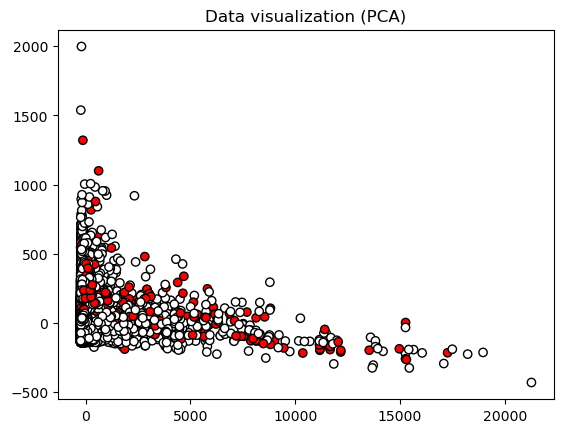

In [23]:
#este o tehnică de reducere a dimensionalității folosită frecvent în învățarea automată și 
#analiza datelor.
plot("Data visualization (PCA)", pca_features, y_true)

In [24]:
######################Grafice #################################################

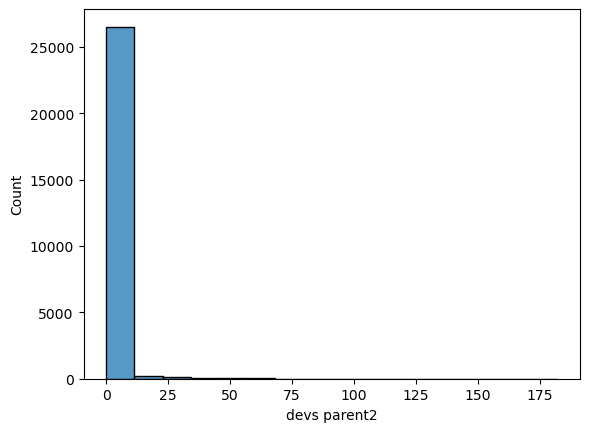

In [25]:
sns.histplot(x=dataframe.columns[4], data=dataframe)
plt.show()


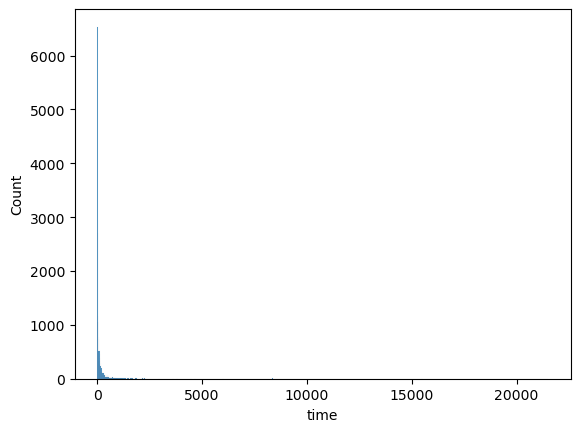

In [26]:
sns.histplot(x=dataframe.columns[5], data=dataframe)
plt.show()

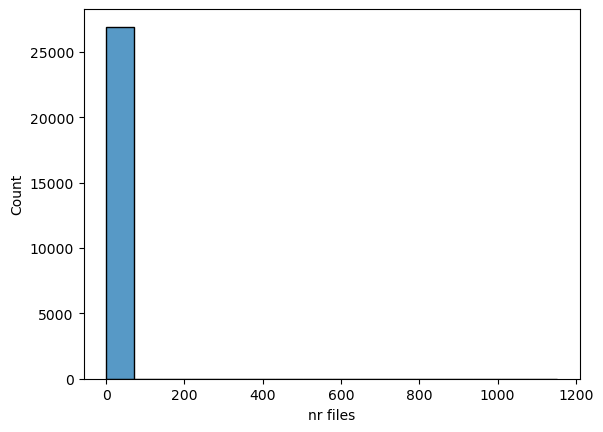

In [27]:
sns.histplot(x=dataframe.columns[6], data=dataframe)
plt.show()

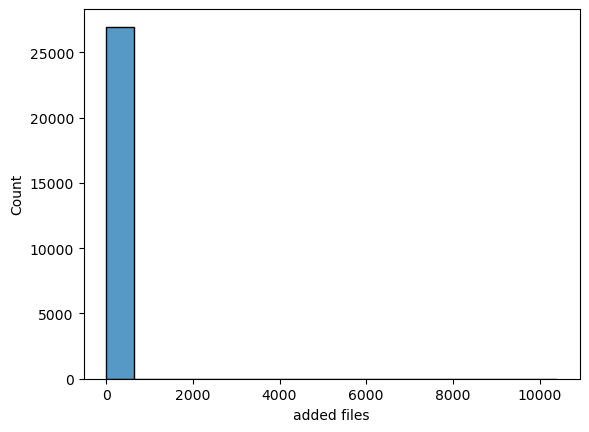

In [28]:
sns.histplot(x=dataframe.columns[7], data=dataframe)
plt.show()

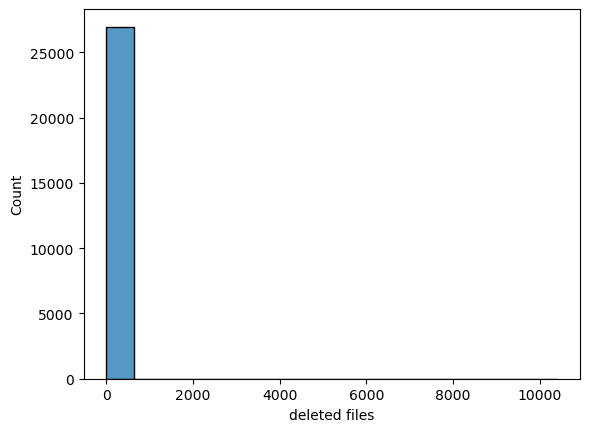

In [29]:
sns.histplot(x=dataframe.columns[8], data=dataframe)
plt.show()

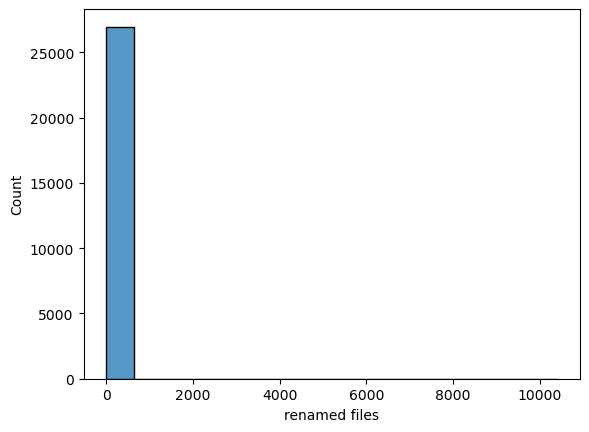

In [30]:
sns.histplot(x=dataframe.columns[9], data=dataframe)
plt.show()

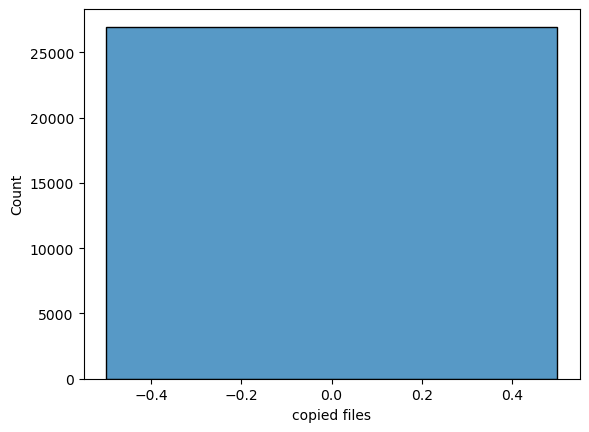

In [31]:
sns.histplot(x=dataframe.columns[10], data=dataframe)
plt.show()

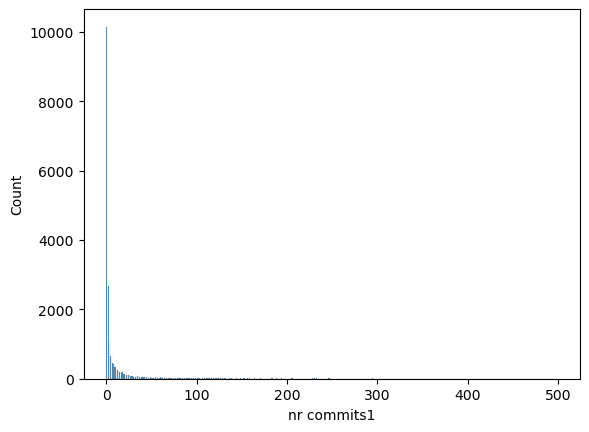

In [32]:
sns.histplot(x=dataframe.columns[12], data=dataframe)
plt.show()

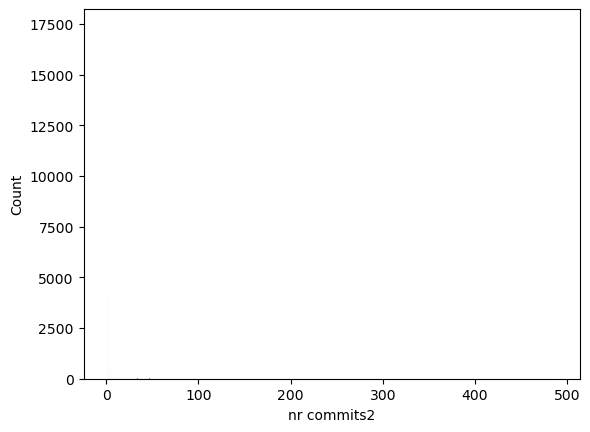

In [33]:
sns.histplot(x=dataframe.columns[13], data=dataframe)
plt.show()

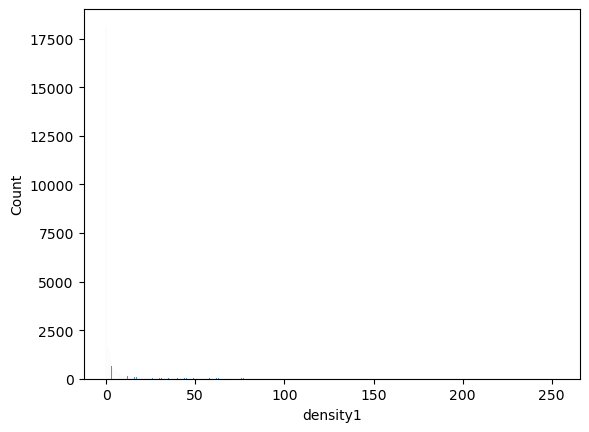

In [34]:
sns.histplot(x=dataframe.columns[14], data=dataframe)
plt.show()

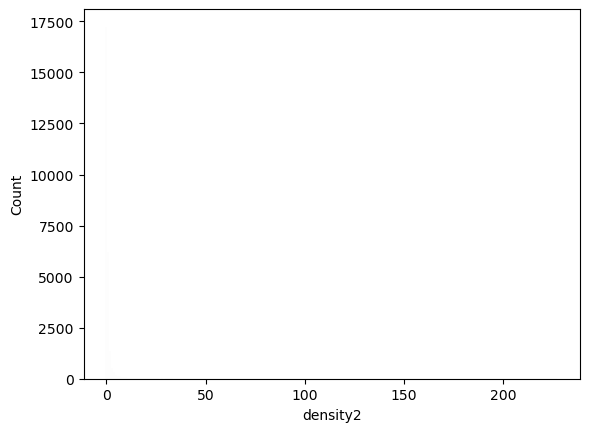

In [35]:
sns.histplot(x=dataframe.columns[15], data=dataframe)
plt.show()

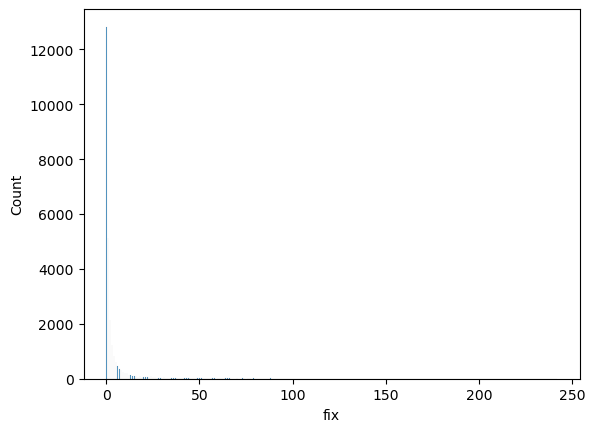

In [36]:
sns.histplot(x=dataframe.columns[16], data=dataframe)
plt.show()

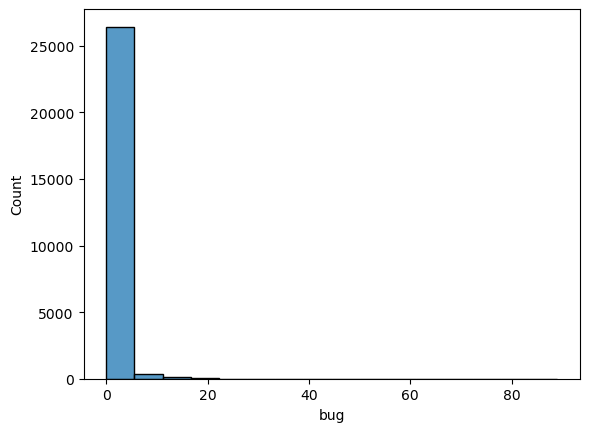

In [37]:
sns.histplot(x=dataframe.columns[17], data=dataframe)
plt.show()

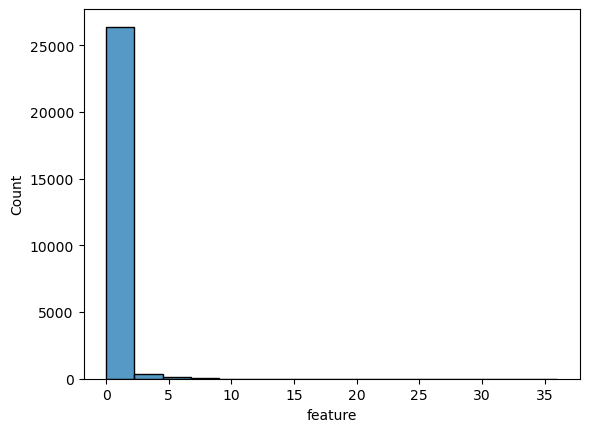

In [38]:
sns.histplot(x=dataframe.columns[18], data=dataframe)
plt.show()

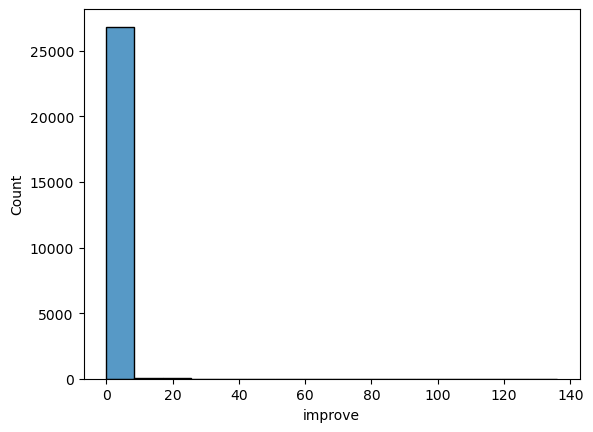

In [39]:
sns.histplot(x=dataframe.columns[19], data=dataframe)
plt.show()

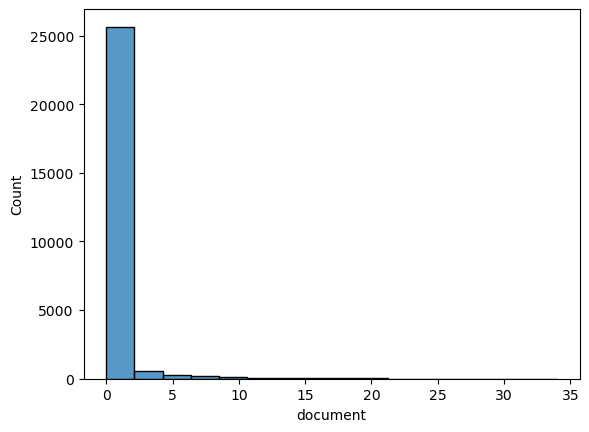

In [40]:
sns.histplot(x=dataframe.columns[20], data=dataframe)
plt.show()

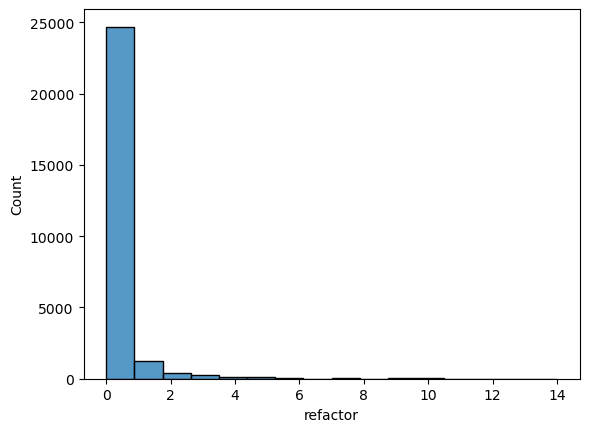

In [41]:
sns.histplot(x=dataframe.columns[21], data=dataframe)
plt.show()

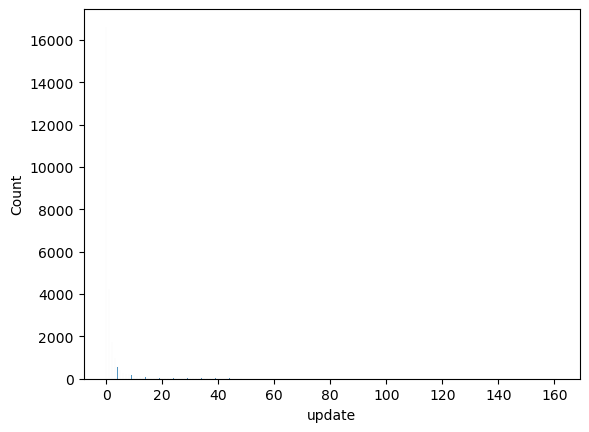

In [42]:
sns.histplot(x=dataframe.columns[22], data=dataframe)
plt.show()

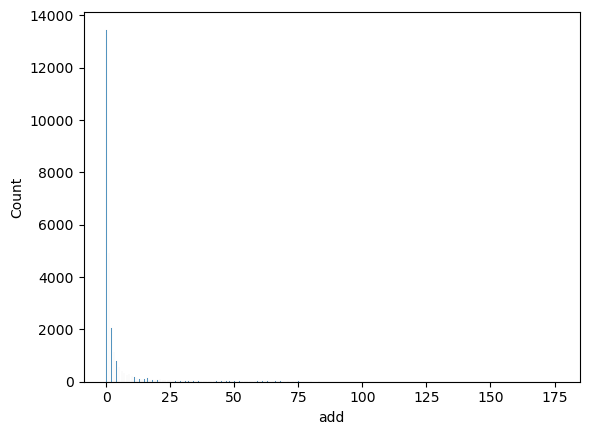

In [43]:
sns.histplot(x=dataframe.columns[23], data=dataframe)
plt.show()

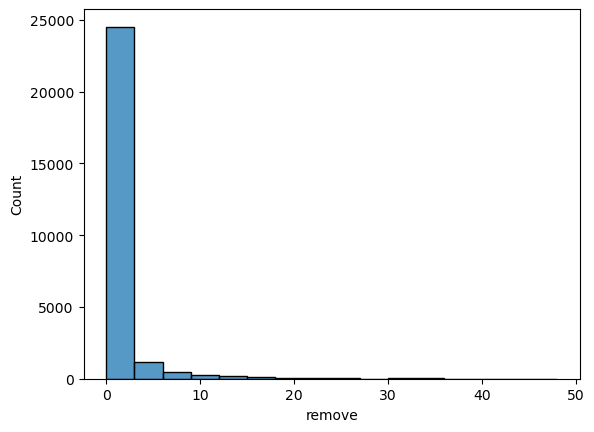

In [44]:
sns.histplot(x=dataframe.columns[24], data=dataframe)
plt.show()

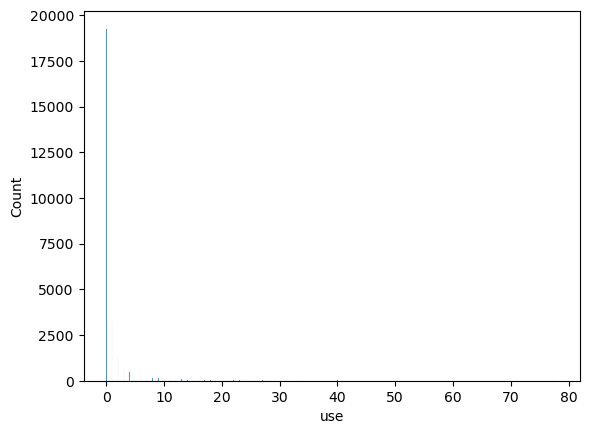

In [45]:
sns.histplot(x=dataframe.columns[25], data=dataframe)
plt.show()

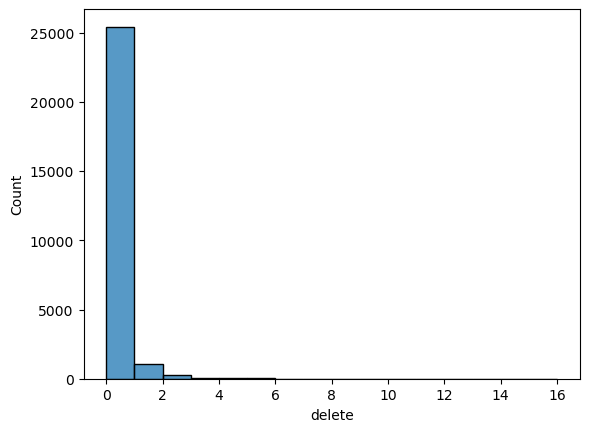

In [46]:
sns.histplot(x=dataframe.columns[26], data=dataframe)
plt.show()

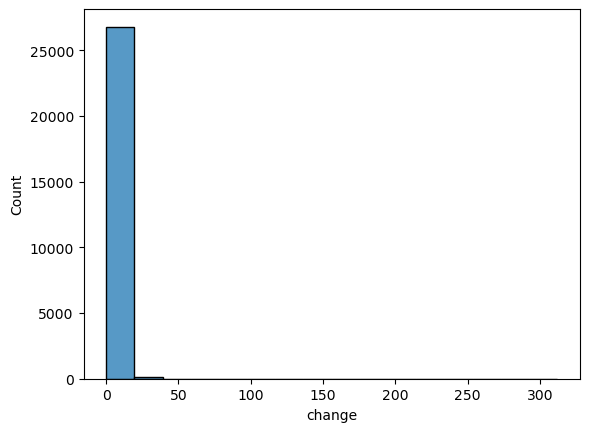

In [47]:
sns.histplot(x=dataframe.columns[27], data=dataframe)
plt.show()

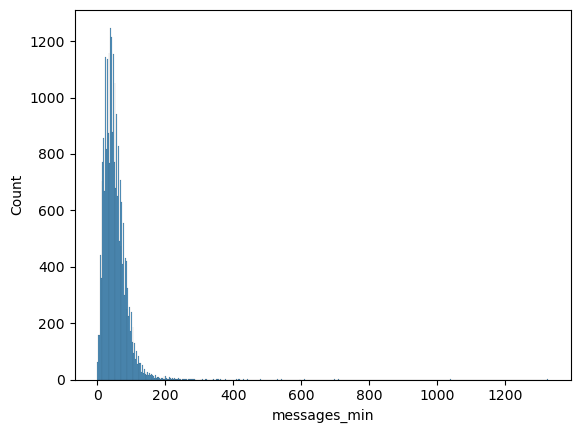

In [48]:
sns.histplot(x=dataframe.columns[28], data=dataframe)
plt.show()

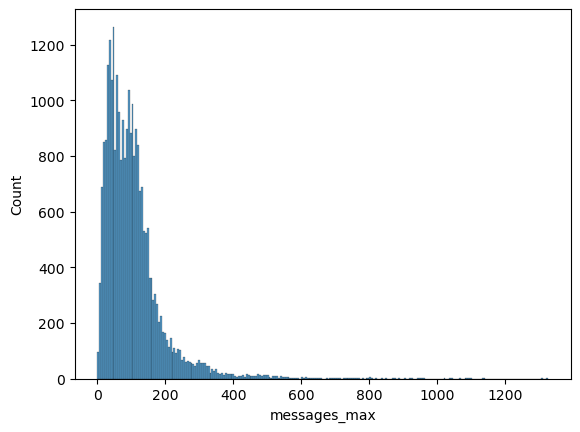

In [49]:
sns.histplot(x=dataframe.columns[29], data=dataframe)
plt.show()

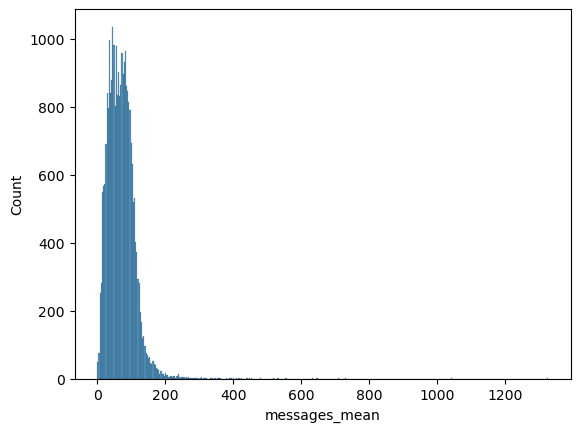

In [50]:
sns.histplot(x=dataframe.columns[30], data=dataframe)
plt.show()

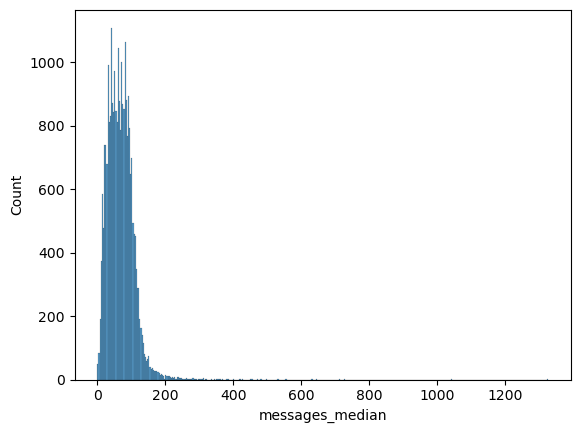

In [51]:
sns.histplot(x=dataframe.columns[31], data=dataframe)
plt.show()

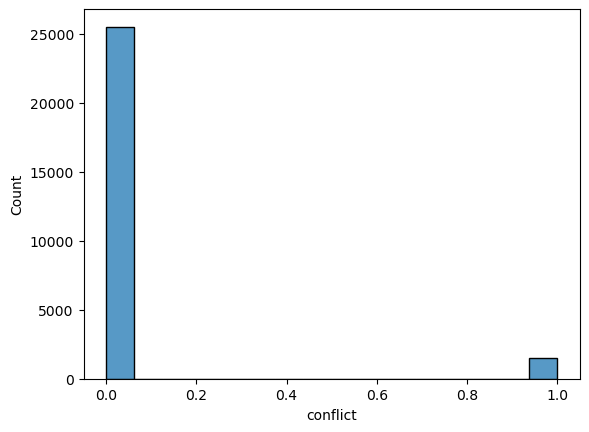

In [52]:
sns.histplot(x=dataframe.columns[32], data=dataframe)
plt.show()

#Impartire date in train si test:

In [53]:
# train test splitting -> 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.25, random_state=42)


In [54]:
#creare clasificator
# atribuie ponderi-->1: clasa min, 20: clasa max
clf = SVC(class_weight={1: 20})

# Scalare date

In [55]:
#scalare date de train: pentru a ajusta valorile pentru date STANDARD sau compatibile.

#[1] previne discrepantele intre u.m.
#[2] imbunatatirea algoritmilor, prin modificarea datelor


# media =0 & deviatia standard 1 

X_train = StandardScaler().fit_transform(X_train)

# este important sa se scaleze si testele, fiindca clasificatorul a fost antrenat pe date scalate    
X_test = StandardScaler().fit_transform(X_test)

#Antrenare model

In [56]:
clf.fit(X_train, y_train)

SVC(class_weight={1: 20})

#Selecția și evaluarea modelelor pe setul de antrenare

# Predictia TRAIN = pentru antrenare(Underfitting)

Predictia-Train(Underfitting)= acuratete scazuta pt acuratetea la antrenare!!!

In [57]:
y_pred = clf.predict(X_train)

#Predictia pentru "conflict"- folosind TRAIN

Sursa: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [58]:
raport=classification_report(y_train, y_pred, target_names=['ok', 'conflict'])
linii = raport.split('\n')
for linie in linii:
    print(linie)    

              precision    recall  f1-score   support

          ok       1.00      0.92      0.96     19144
    conflict       0.41      0.99      0.58      1085

    accuracy                           0.92     20229
   macro avg       0.70      0.95      0.77     20229
weighted avg       0.97      0.92      0.94     20229



#Predictia TEST (Overfitting)

In [59]:
y_pred = clf.predict(X_test)

#Predictia pentru "conflict", folosind test

In [60]:
# support: mostre din fiecare clasa 
raport=classification_report(y_test, y_pred, target_names=['ok', 'conflict'])
linii = raport.split('\n')
for linie in linii:
    print(linie)

              precision    recall  f1-score   support

          ok       0.99      0.89      0.94      6361
    conflict       0.31      0.85      0.46       383

    accuracy                           0.88      6744
   macro avg       0.65      0.87      0.70      6744
weighted avg       0.95      0.88      0.91      6744



# Evaluare metrici

In [61]:
# nr de predictii corecte/ nr totatl de predictii
accuracy_score(y_test, y_pred)

0.8847864768683275

In [62]:
# TP/TP+FP
precision_score(y_test, y_pred)

0.31166347992351817

In [63]:
# TP/(TP+FN)
recall_score(y_test, y_pred)

0.8511749347258486

In [64]:
# masura intre acuratete si precizie
# F1 = 2*(precizie*recall)/(precizie+recall)
f1_score(y_test, y_pred)

0.45626312106368094

Observatie: Pentru setul de date folosit, acuratetea este 0.88, din punctul de vedere al performantei, se poate observa metrica f1, care indica performanta pentru clasificare binara.
F1: metoda de calcul: media aeminica dintre precizie si recall.

#Cross Validation

se evalueaza performantele, folosind setul date, numarul de date din setul pentru testare, numarul de future



cv= numarul de partitii ale modelului pentru care se realizeaza cross validation

scoring=metricile ce vor fi analizate pe parcursul validarii

#Selectarea/Alegerea metricilor de performanta

In [65]:
scoring = { 'acc': 'accuracy', # cat de bine va prezice ceva corect
            'f1': 'f1', #precizie pentru true_pozitiv
            'f1_macro': 'f1_macro', # media armonica intre modele clasificate corect si nr. total de exemple
            'prec_macro': 'precision_macro',
            'rec_macro': make_scorer(recall_score, average='macro'),
            }

#Calculare Scor pt metricile de mai sus

In [66]:
#cate de bine genereaza pe seturi noi de date, pe care nu le-a mai vazut.
# cv= 10: numarul de perti in cre se imparte
scores = cross_validate(clf, X, y_true, cv=10, scoring=scoring, return_train_score=True)

Acuratete: Train & Test

In [67]:
np.mean(np.array(scores['train_acc']))

0.8473000555404813

In [68]:
np.mean(np.array(scores['test_acc']))

0.8353138305664833

F1: Train & Test[folosete media armonica]

In [69]:
np.mean(np.array(scores['train_f1']))

0.327548483652294

In [70]:
np.mean(np.array(scores['test_f1']))

0.2987897488690178

F1 macro: Train & Test[pt date dezechilibrate, calculeaza f1 pt fiecare clasa]

In [71]:
np.mean(np.array(scores['train_f1_macro']))

0.6206922936373787

In [72]:
np.mean(np.array(scores['test_f1_macro']))

0.6025665856551397

Precizia: Train & Test

In [73]:
np.mean(np.array(scores['train_prec_macro']))

0.597477485627582

In [74]:
np.mean(np.array(scores['test_prec_macro']))

0.5869221055437375

Recall macro: Train & Test

In [75]:
np.mean(np.array(scores['train_rec_macro']))

0.7690635365159506

In [76]:
np.mean(np.array(scores['test_rec_macro']))

0.741399478760697

#Decision tree

Preluare date, fiindca doresc sa folosesc datele nealterate, le voi prelua din nou din tabel, fiindca, in urma testarii si verificarii repetate, pentru a obtine date cu valori mai bune, am modificat procentul de date de test/train de la un clasificator la altul.

Preluarea datelor

In [77]:
dataframe = pd.read_csv("MergeConflictsDataset.csv",sep=';', header=0)
dataframe.isnull().sum()

commit             0
parent1            0
parent2            0
ancestor           1
is pr              0
added lines        0
deleted lines      0
devs parent1       0
devs parent2       0
time               0
nr files           0
added files        0
deleted files      0
renamed files      0
copied files       0
modified files     0
nr commits1        0
nr commits2        0
density1           0
density2           0
fix                0
bug                0
feature            0
improve            0
document           0
refactor           0
update             0
add                0
remove             0
use                0
delete             0
change             0
messages_min       0
messages_max       0
messages_mean      0
messages_median    0
conflict           0
dtype: int64

Eliminarea coloanelor cu date care influienteaza nrgativ rezultatul

In [78]:
#ffiindca "amcestor" are valori nule, voi elimina aceasta coloana
dataframe=dataframe.drop("ancestor", axis=1)  
dataframe=dataframe.drop("commit", axis=1) 
dataframe=dataframe.drop("parent1", axis=1)
dataframe=dataframe.drop("parent2", axis=1)

Encodare date

In [79]:
oe = OrdinalEncoder()
data_to_encode = dataframe.to_numpy()[:, :1]
encoded = oe.fit_transform(data_to_encode) 

data = dataframe.to_numpy()
X= np.hstack((encoded, data[:, 4:-1]))
y_true =  dataframe['conflict']

Impartirea datelor in date de test si train

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.20, random_state=42)

Scalarea setului de test si train

In [81]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

creare model model

In [82]:
clf= DecisionTreeClassifier(criterion = 'gini', max_depth=16, min_samples_leaf = 4, min_samples_split = 6)

Antrenare model

In [83]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=16, min_samples_leaf=4, min_samples_split=6)

Predictia TEST (Overfitting)	

In [84]:
y_pred = clf.predict(X_test)

Predictia pentru "conflict", folosind test

In [86]:
raport=classification_report(y_test, y_pred, target_names=['ok', 'conflict'])
linii = raport.split('\n')
for linie in linii:
    print(linie)

              precision    recall  f1-score   support

          ok       0.97      0.98      0.98      5090
    conflict       0.66      0.50      0.57       305

    accuracy                           0.96      5395
   macro avg       0.82      0.74      0.77      5395
weighted avg       0.95      0.96      0.95      5395



Evaluare metrici

In [87]:
accuracy_score(y_test, y_pred)

0.9573679332715477

In [88]:
precision_score(y_test, y_pred)

0.6637554585152838

In [89]:
# true_pozitiv/(true_pozitiv + false_negativ)
recall_score(y_test, y_pred)

0.49836065573770494

In [90]:
f1_score(y_test, y_pred)

0.5692883895131086

#Cross validation

Selectarea/Alegerea metricilor de performanta

In [91]:
scoring = { 'acc': 'accuracy', # cat de bine va prezice ceva corect
            'f1': 'f1', #precizie pentru true_pozitiv
            'f1_macro': 'f1_macro', # media armonica intre modele clasificate corect si nr. total de exemple
            'prec_macro': 'precision_macro',
            'rec_macro': make_scorer(recall_score, average='macro'),
            }

Calculare Scor pt metricile de mai sus

In [92]:
scores = cross_validate(clf, X, y_true, cv=10, scoring=scoring, return_train_score=True)

Acuratete: Train & Test

In [93]:
np.mean(np.array(scores['train_acc']))

0.9844988884267586

In [94]:
np.mean(np.array(scores['test_acc']))

0.9489847187647478

F1: Train & Test

In [95]:
np.mean(np.array(scores['train_f1']))

0.8496554028062123

In [96]:
np.mean(np.array(scores['test_f1']))

0.5274416540197324

F1 macro: Train & Test[pt date dezechilibrate, calculeaza f1 pt fiecare clasa]


In [97]:
np.mean(np.array(scores['train_f1_macro']))

0.9207417088669836

In [98]:
np.mean(np.array(scores['test_f1_macro']))

0.7502272108829307

Precizia: Train & Test

In [99]:
np.mean(np.array(scores['train_prec_macro']))

0.944359177735965

In [100]:
np.mean(np.array(scores['test_prec_macro']))

0.7729006065514581

Recall macro: Train & Test

In [101]:
np.mean(np.array(scores['train_rec_macro']))

0.9000699306410628

In [102]:
np.mean(np.array(scores['test_rec_macro']))

0.7365011406301296

#Reprezentare grafica arbore

[Text(0.5755901877214069, 0.9705882352941176, 'X[3] <= 0.107\ngini = 0.102\nsamples = 21578\nvalue = [20415, 1163]'),
 Text(0.2918211902201417, 0.9117647058823529, 'X[3] <= -0.028\ngini = 0.047\nsamples = 20302\nvalue = [19810, 492]'),
 Text(0.11007085020242915, 0.8529411764705882, 'X[0] <= -0.672\ngini = 0.003\nsamples = 17053\nvalue = [17029, 24]'),
 Text(0.08248987854251012, 0.7941176470588235, 'X[8] <= -0.101\ngini = 0.017\nsamples = 2539\nvalue = [2517, 22]'),
 Text(0.05263157894736842, 0.7352941176470589, 'X[18] <= 1.731\ngini = 0.12\nsamples = 187\nvalue = [175, 12]'),
 Text(0.032388663967611336, 0.6764705882352942, 'X[2] <= -0.269\ngini = 0.089\nsamples = 171\nvalue = [163, 8]'),
 Text(0.016194331983805668, 0.6176470588235294, 'X[26] <= 0.156\ngini = 0.211\nsamples = 50\nvalue = [44, 6]'),
 Text(0.008097165991902834, 0.5588235294117647, 'X[26] <= -0.299\ngini = 0.363\nsamples = 21\nvalue = [16, 5]'),
 Text(0.004048582995951417, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),

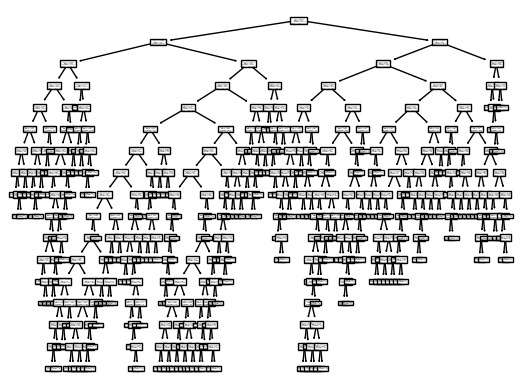

In [103]:
tree.plot_tree(clf)

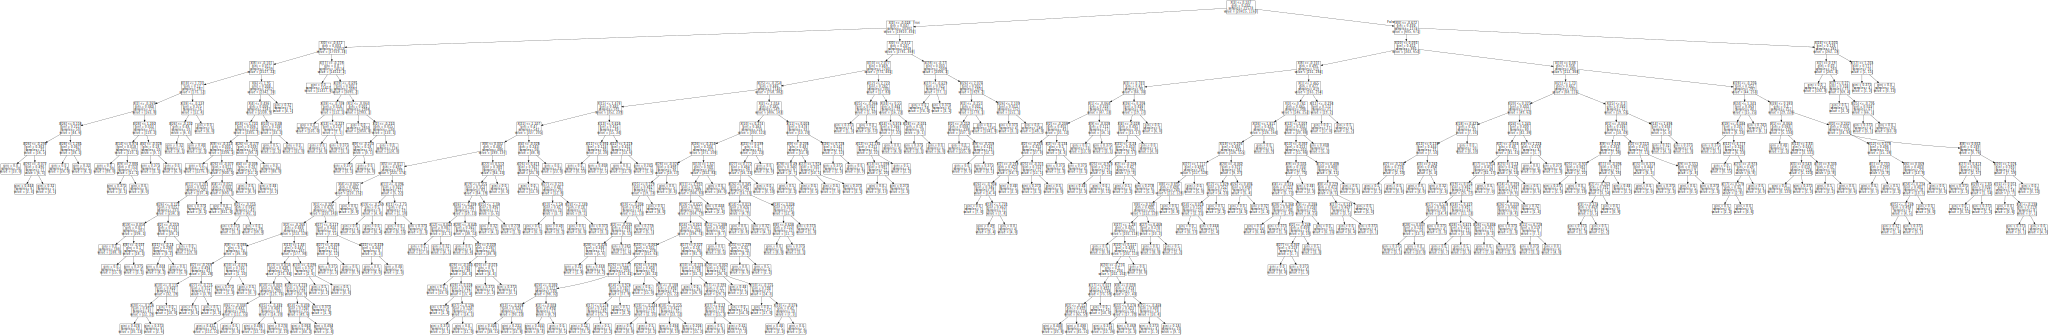

In [104]:
dot_data = tree.export_graphviz(clf) 
dot_data = tree.export_graphviz(clf)
                                
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph

# Clasificator: Random Forest

In [105]:
dataframe = pd.read_csv("MergeConflictsDataset.csv",sep=';', header=0)
dataframe.isnull().sum()

le = LabelEncoder()
data_1 = dataframe.apply(le.fit_transform)

X = data_1[dataframe.columns.drop('conflict','messages_median' )]

y = data_1['conflict']

In [106]:
# train test splitting -> 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.20, random_state=42)

In [107]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
# Hyperparametri (adaptati dupa fiecare  rulare )

# entropia: masoara dezoedinea
# numarul max de caracterisitici luate in considerare: 0.96
# [min_samples_leaf] = umarul minim de mostre pentru a crea o frunza
# [numarul de arbori] luati in cosiderare
# [n_jobs]procese paralele pt invatare

# Subset de arbori antrenati pe un set de atribute.

rf = RandomForestClassifier(criterion='entropy',
                                                                      max_depth=33,
                                                                      max_features=0.96767492789704,
                                                                      
                                                                      min_samples_leaf=5,
                                                                      min_samples_split=2,
                                                                      n_estimators=370,
                                                                      n_jobs=-1,
                                                                      class_weight="balanced",
                                                                      random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=33, max_features=0.96767492789704,
                       min_samples_leaf=5, n_estimators=370, n_jobs=-1,
                       random_state=42)

Selecția și evaluarea modelelor pe setul de antrenare

Predictia-Train(Underfitting)= acuratete scazuta pt acuratetea la antrenare!!!


In [110]:
y_pred = rf.predict(X_train)

In [111]:
#Predictia pentru "conflict"- folosind TRAIN

raport=classification_report(y_train, y_pred, target_names=['ok', 'conflict'])
linii = raport.split('\n')
for linie in linii:
    print(linie)   

              precision    recall  f1-score   support

          ok       1.00      0.98      0.99     20415
    conflict       0.77      1.00      0.87      1163

    accuracy                           0.98     21578
   macro avg       0.88      0.99      0.93     21578
weighted avg       0.99      0.98      0.98     21578



In [112]:
#Predictia TEST (Overfitting)	
y_pred = rf.predict(X_test)

In [113]:
#Predictia pentru "conflict", folosind test

raport=classification_report(y_test, y_pred, target_names=['ok', 'conflict'])
linii = raport.split('\n')
for linie in linii:
    print(linie)

              precision    recall  f1-score   support

          ok       0.99      0.97      0.98      5090
    conflict       0.65      0.83      0.73       305

    accuracy                           0.96      5395
   macro avg       0.82      0.90      0.85      5395
weighted avg       0.97      0.96      0.97      5395



#Evaluare metrici	

In [114]:
accuracy_score(y_test, y_pred)

0.964967562557924

In [115]:
precision_score(y_test, y_pred)

0.6487179487179487

In [116]:
# true_pozitiv/(true_pozitiv + false_negativ)
recall_score(y_test, y_pred)

0.8295081967213115

In [117]:
f1_score(y_test, y_pred)

0.7280575539568346

#Cross Validation

#Selectarea/Alegerea metricilor de performanta

In [118]:
scoring = { 'acc': 'accuracy', # cat de bine va prezice ceva corect
            'f1': 'f1', #precizie pentru true_pozitiv
            'f1_macro': 'f1_macro', # media armonica intre modele clasificate corect si nr. total de exemple
            'prec_macro': 'precision_macro',
            'rec_macro': make_scorer(recall_score, average='macro'),
            }


Calculare Scor pt metricile de mai sus

In [119]:
scores = cross_validate(rf, X, y_true, cv=10, scoring=scoring, return_train_score=True)

Acuratete: Train & Test

In [120]:
np.mean(np.array(scores['train_acc']))

0.9834113974904797

In [121]:
np.mean(np.array(scores['test_acc']))

0.9482803422411801

F1: Train & Test

In [122]:
np.mean(np.array(scores['train_f1']))

0.8677668281184918

In [123]:
np.mean(np.array(scores['test_f1']))

0.6341481529270221

F1 macro: Train & Test[pt date dezechilibrate, calculeaza f1 pt fiecare clasa]

In [124]:
np.mean(np.array(scores['train_f1_macro']))

0.9294587146195641

In [125]:
np.mean(np.array(scores['test_f1_macro']))

0.8031144274884033

Precizia: Train & Test

In [126]:
np.mean(np.array(scores['train_prec_macro']))

0.8832683554079115

In [127]:
np.mean(np.array(scores['test_prec_macro']))

0.774535166136796

Recall macro: Train & Test

In [128]:
np.mean(np.array(scores['train_rec_macro']))

0.9911569586641192

In [129]:
np.mean(np.array(scores['test_rec_macro']))

0.8599984059673712

Observatii in urma implementarii:
---
1. Pentru realizarea acestui proiect, am analizat un set de date care contine date puternic dezechilibrat
2. In setul de date de care am dispus, au existat date incomplete, a se vedea datele pentru 'Ascensor'
3. Conform observatiilor 1 si 2, modelele pe care la-am luat in considereare pentru a testa si antrena modelul sunt: SVM, Decision Tree, Random Forest Tree.
4. Intrucat modelul trebuie aiba un comportament bun pentru date mari, cu lipsuri si sa evite overfittin-ul, modelul care se pliaza cel mai bine, in urma analizelor si a rezultatelor de mai sus, este Random Fores Tree.
5. In cadrul  metricilor pe care le-am ales, pentru surprinderea performantelor,f1, recall, acuratete, si macro, aplicate pentru cazurile de test, sunt valoroase pentru a surprinde performantele modelului.

Bibliografie:

[1]https://scikit-learn.org/stable/modules/model_evaluation.html

[2]https://numpy.org/doc/stable/reference/generated/numpy.array.html

[3]https://scikit-learn.org/stable/modules/cross_validation.html

[4] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

[5] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

[6] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

[7] https://scikit-learn.org/stable/modules/model_evaluation.html